In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2

print('tensorflow version:{0}'.format(tf.__version__))
print('pandas version:{0}'.format(pd.__version__))
print('numpy version:{0}'.format(np.__version__))
print('matplotlib version:{0}'.format(matplotlib.__version__))

tensorflow version:2.4.1
pandas version:1.2.3
numpy version:1.22.3
matplotlib version:3.3.4


In [10]:

plt.rcParams["figure.figsize"] = [7.2, 5.4]  
plt.rcParams["figure.dpi"] = 150  
plt.rcParams["figure.autolayout"] = False  
plt.rcParams["figure.subplot.left"] = 0.14  
plt.rcParams["figure.subplot.bottom"] = 0.14  
plt.rcParams["figure.subplot.right"] = 0.90  
plt.rcParams["figure.subplot.top"] = 0.91  
plt.rcParams["figure.subplot.wspace"] = 0.20  
plt.rcParams["figure.subplot.hspace"] = 0.20  


plt.rcParams["font.family"] = "serif"  
plt.rcParams["font.serif"] = "Calibri"
plt.rcParams["font.size"] = 14 
plt.rcParams["mathtext.cal"] = "serif"  
plt.rcParams["mathtext.rm"] = "serif"  
plt.rcParams["mathtext.fontset"] = "custom" 
plt.rcParams["mathtext.it"] = "serif:bold:italic"  
plt.rcParams["mathtext.bf"] = "serif:bold" 


plt.rcParams["xtick.direction"] = "in"  
plt.rcParams["ytick.direction"] = "in"  

plt.rcParams["xtick.top"] = True  
plt.rcParams["xtick.bottom"] = True  
plt.rcParams["ytick.left"] = True  
plt.rcParams["ytick.right"] = True  

plt.rcParams["xtick.major.size"] = 4.0  
plt.rcParams["ytick.major.size"] = 4.0  
plt.rcParams["xtick.major.width"] = 1.0  
plt.rcParams["ytick.major.width"] = 1.0  

plt.rcParams["xtick.minor.visible"] = True  
plt.rcParams["ytick.minor.visible"] = True  
plt.rcParams["xtick.minor.size"] = 2.0  
plt.rcParams["ytick.minor.size"] = 2.0  
plt.rcParams["xtick.minor.width"] = 0.6  
plt.rcParams["ytick.minor.width"] = 0.6  

plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14  


plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["axes.linewidth"] = 1.0  
plt.rcParams["axes.grid"] = False  
plt.rcParams["axes.titleweight"] = "bold"  
plt.rcParams["axes.labelweight"] = "bold"  


plt.rcParams["grid.color"] = "black"  
plt.rcParams["grid.linewidth"] = 0  


plt.rcParams["legend.loc"] = "right"  
plt.rcParams["legend.frameon"] = True  
plt.rcParams["legend.framealpha"] = 0.5  
plt.rcParams["legend.facecolor"] = "white"  
plt.rcParams["legend.edgecolor"] = "black"  
plt.rcParams["legend.fancybox"] = True  

In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [23]:
class Model():
    
    def __init__(self, path):
        self.model = tf.keras.models.load_model(path, compile=False)
        self.sem = None
        self.pred = None
        
    def predict(self, path):
        self.sem = np.array(cv2.imread(path, 0))/255
        pred = self.model(self.sem.reshape([1, 256, 256, 1]), training = False)
        self.pred = np.round(np.array(pred).reshape([256,256]))
        
    def show(self,):
    
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(self.sem, cmap='gray')
        ax1 = fig.add_subplot(1, 2, 2)
        ax1.imshow(self.pred, cmap='gray')
        
        plt.show()

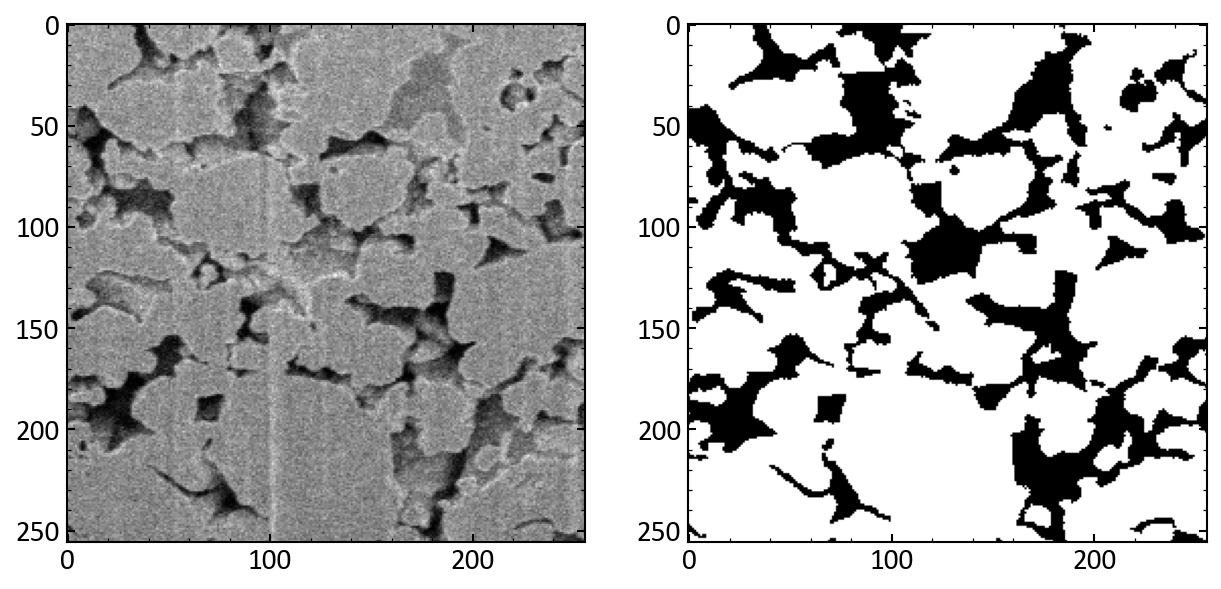

In [24]:
unet = Model('./unet.h5')
unet.predict('./sample/sample_002_sem.bmp')
unet.show()